In [ ]:
!pip install bing_image_downloader

In [ ]:
import warnings #To handle Warning
warnings.filterwarnings("ignore")

import os #path
import shutil #copy file
import glob #patern match
from bing_image_downloader import downloader

# Import data

In [ ]:
# !unzip /content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/test1.zip
# !unzip /content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/train.zip

In [ ]:
# downloader.download('cat', output_dir='/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/images', limit=25000, adult_filter_off=True)

In [ ]:
# downloader.download('dog', output_dir='/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/images', limit=11286, adult_filter_off=True)

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/DATASET"
ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [ ]:
#to Seperate the data into Different Categeory

for C in CLASS:
    DEST = os.path.join(TRAIN_DIR,C)

    if not os.path.exists(DEST):
      os.makedirs(DEST)

    for img_path in glob.glob(os.path.join(ORG_DIR,C)+ "*"):
      SRC = img_path
      warnings.filterwarnings("ignore")
      shutil.copy(SRC, DEST)
    
  

# Model Bulding

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import keras
!pip install keras
import keras
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# creating Base model

base_model = InceptionV3(input_shape=(256,256,3), include_top=False)


87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# base model doent requir train
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# base model prprocessing
X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X)

#create Model
model = Model(base_model.input, X)
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

# Pre-processing the data Using Data Generator

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range = 0.4,
                                   width_shift_range = 0.3,
                                   zoom_range = 0.4,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   preprocessing_function = preprocess_input,
                                   shear_range = 0.4)

train_data = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/DATASET',
                                                  target_size = (256,256),
                                                  batch_size = 36)

Found 25000 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'cat': 0, 'dog': 1}

# Visualizing the Data

In [ ]:
t_img, label = train_data.next()

In [ ]:
t_img.shape
#batch no, width, height, layer

(36, 256, 256, 3)

In [ ]:
def plotImages(img_array, label):
  """
  input : Image Array
  Output : plot Image
  """

  for inx , img in enumerate(img_array):
    if inx <= 10:
      plt.figure(figsize=(5,5))
      plt.title("Image, label")
      plt.imshow(img)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


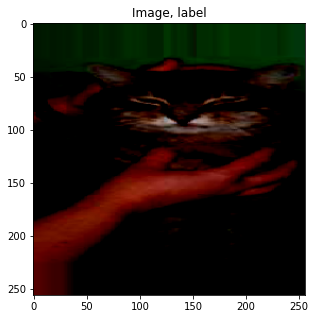

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


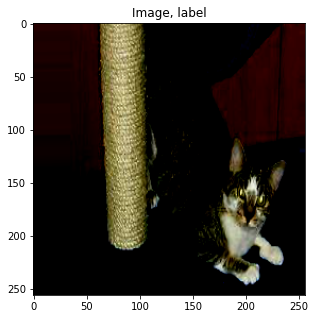

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


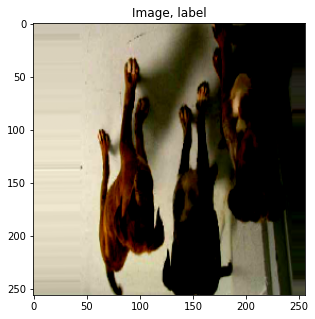

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


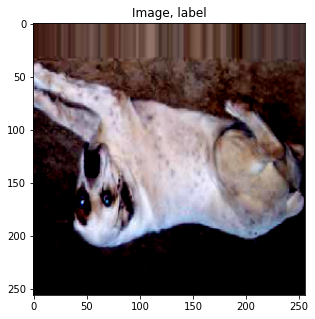

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


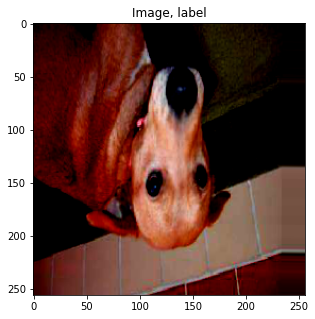

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


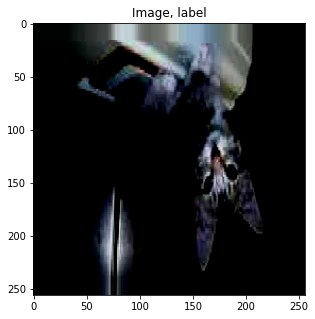

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


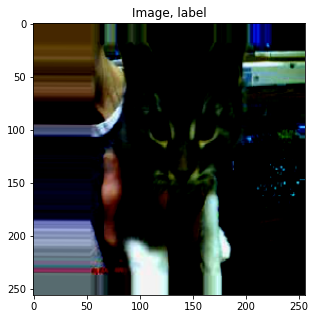

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


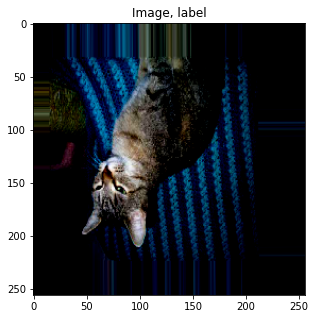

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


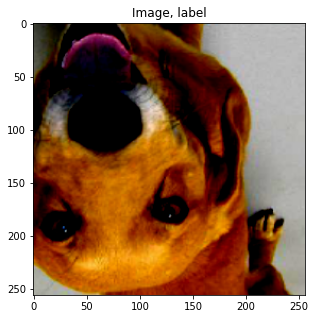

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


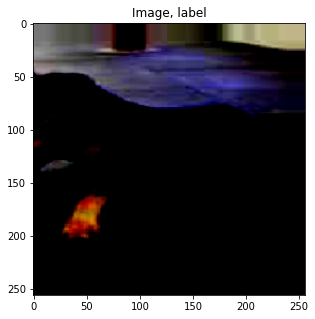

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


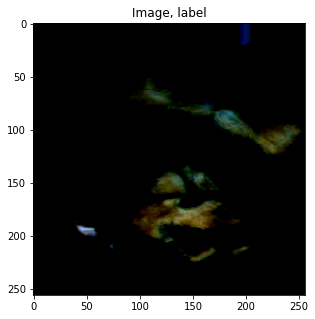

In [ ]:
plotImages(t_img, label)

# Model Check Point

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc = ModelCheckpoint(filepath = '/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/best_model.h5', 
                     monitor = 'accuracy',
                     varbose = 1,
                     save_best_only = True)

es = EarlyStopping(monitor = 'accuracy',
                   min_delta = 0.01,
                   patience = 5,
                   verbose = 1)

cb = [mc,es]

# Train model

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 30,
                          callbacks = cb)

Epoch 1/30
10/10 [==============================] - 59s 5s/step - loss: 1.7847 - accuracy: 0.7528
Epoch 2/30
10/10 [==============================] - 54s 5s/step - loss: 1.4910 - accuracy: 0.8250
Epoch 3/30
10/10 [==============================] - 57s 5s/step - loss: 0.9500 - accuracy: 0.8972
Epoch 4/30
10/10 [==============================] - 55s 5s/step - loss: 0.6364 - accuracy: 0.9139
Epoch 5/30
10/10 [==============================] - 55s 5s/step - loss: 0.7898 - accuracy: 0.8944
Epoch 6/30
10/10 [==============================] - 55s 5s/step - loss: 0.6951 - accuracy: 0.9194
Epoch 7/30
10/10 [==============================] - 56s 5s/step - loss: 0.6056 - accuracy: 0.9278
Epoch 8/30
10/10 [==============================] - 55s 5s/step - loss: 0.4623 - accuracy: 0.9417
Epoch 9/30
10/10 [==============================] - 55s 5s/step - loss: 0.3271 - accuracy: 0.9306
Epoch 10/30
10/10 [==============================] - 55s 5s/step - loss: 0.5266 - accuracy: 0.9250
Epoch 11/30
10/10 [

# Load Model

In [ ]:
 from keras.models import load_model

 model = load_model('/content/drive/MyDrive/ML/Renkube/ImageClassification_CNN/best_model.h5')

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

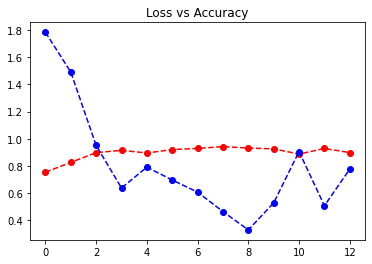

In [ ]:
plt.plot(h['accuracy'], 'go--', c='red')
plt.plot(h['loss'], 'go--', c='blue')
plt.title("Loss vs Accuracy")
plt.show()

# Validate my image

the image is CAT


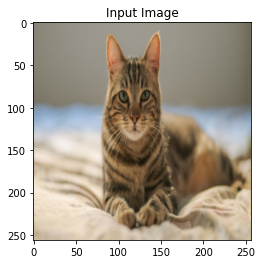

In [ ]:
 from keras.preprocessing.image import load_img, img_to_array
 from skimage.io import imread #image read
 from skimage.transform import resize #to resize the Image
 path = 'https://c.files.bbci.co.uk/151AB/production/_111434468_gettyimages-1143489763.jpg'
 img = imread(path)
 img = resize(img, (256,256)) #resize
#  img = load_img(path, target_size =(256,256 ))

#  preprocessing 
i = img_to_array(img)
i = preprocess_input(i)

input_array = np.array([i])
input_array.shape

pred = np.argmax(model.predict(input_array))

# final solution

if pred == 0:
  print("the image is CAT")
else:
  print("The Image is DOG")


# to Show Input Image
plt.imshow(img)
# plt.imshow(input_array[0])
plt.title("Input Image")
plt.show()